In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

## Load data

In [89]:
data = load_iris()
target_names = list(data.target_names)

In [90]:
df = pd.DataFrame(np.concatenate((data.data, np.array([data.target]).T), axis=1), columns=data.feature_names + ['target'])

In [91]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


In [93]:
df.columns = df.columns.str.lower().str.replace(' ', '_').str.replace('_\(cm\)', '')

/var/folders/4t/35nfm0b159g9bz03rt5zzm_h0000gn/T/ipykernel_79084/3604104236.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df.columns = df.columns.str.lower().str.replace(' ', '_').str.replace('_\(cm\)', '')


In [94]:
df['target'] = df['target'].astype('int')

## Exploratory data analysis

Text(0.5, 1.0, 'Iris species')

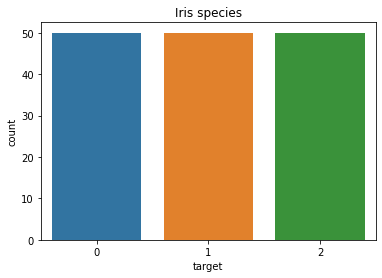

In [95]:
sns.countplot(x="target", data=df);
plt.title("Iris species")

In [96]:
features = [feature for feature in df.columns.to_list() if feature not in ('target')]

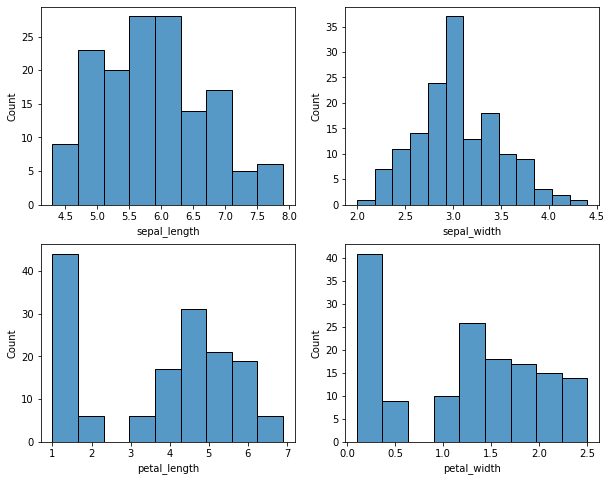

In [97]:
plt.figure(figsize=(10, 8))
for i, feature in enumerate(features):
    plt.subplot(2, 2, i+1)
    sns.histplot(df[feature])

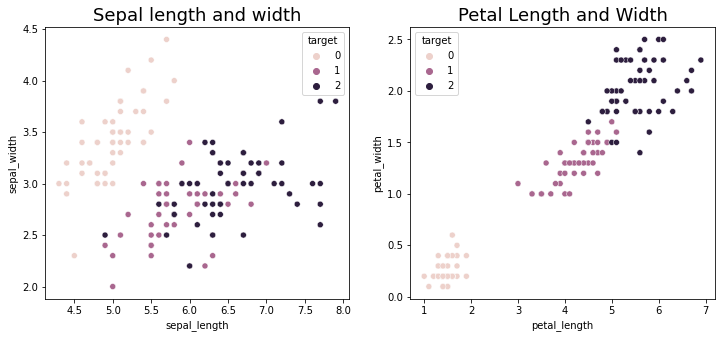

In [125]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
sns.scatterplot(x='sepal_length', y='sepal_width', data=df, ax=ax1, hue="target");
ax1.set_title('Sepal length and width', fontsize=18)
sns.scatterplot(x='petal_length', y='petal_width', data=df, ax=ax2,hue="target");
ax2.set_title('Petal Length and Width', fontsize=18);

<AxesSubplot:>

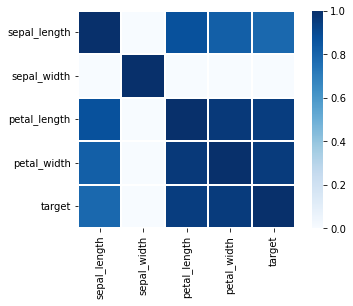

In [100]:
corr = df.corr()
sns.heatmap(corr, vmin=0, vmax=1, linewidths=2, square=True, cmap='Blues')

In [119]:
df.iloc[72:73, :]

,sepal_length,sepal_width,petal_length,petal_width,target
72,6.3,2.5,4.9,1.5,1


In [120]:
df.iloc[146:147, :]

,sepal_length,sepal_width,petal_length,petal_width,target
146,6.3,2.5,5.0,1.9,2


## Baseline model

In [101]:
X = df[features]
y = df.target

kn = KNeighborsClassifier()

scores = cross_val_score(kn, X, y, scoring='accuracy', cv=5)

print(np.mean(scores))

0.9733333333333334


In [102]:
lr = LogisticRegression(solver='liblinear')

scores = cross_val_score(lr, X, y, scoring='accuracy', cv=5)

print(np.mean(scores))

0.9600000000000002


In [110]:
dt = DecisionTreeClassifier(max_leaf_nodes = 4, random_state = 0)

scores = cross_val_score(dt, X, y, scoring='accuracy', cv=5)

print(np.mean(scores))

0.96


## Feature selection

In [115]:
X = df[['petal_length', 'petal_width']]
y = df.target

kn = KNeighborsClassifier()

scores = cross_val_score(kn, X, y, scoring='accuracy', cv=5)

print(np.mean(scores))

0.9666666666666668


## Hyperparameter tunning

In [111]:
param_grid ={'n_neighbors': [3, 5, 7, 10], 'metric': ['cosine', 'minkowski', 'euclidean']}

kn = KNeighborsClassifier()

grid_search = GridSearchCV(kn, param_grid=param_grid, scoring='accuracy', cv=3, )

In [112]:
grid_search.fit(X, y)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['cosine', 'minkowski', 'euclidean'],
                         'n_neighbors': [3, 5, 7, 10]},
             scoring='accuracy')

In [113]:
print(grid_search.best_params_)

{'metric': 'minkowski', 'n_neighbors': 5}


In [114]:
print(grid_search.cv_results_)

{'mean_fit_time': array([0.00139157, 0.00079536, 0.00086649, 0.00072956, 0.00074625,
       0.00083836, 0.0009013 , 0.00084861, 0.00076175, 0.00072455,
       0.00084257, 0.00070691]), 'std_fit_time': array([3.22239172e-04, 2.73555234e-05, 6.91598378e-05, 9.06617801e-06,
       2.14373528e-05, 9.80402657e-05, 1.43207932e-04, 1.40926199e-04,
       6.85173129e-05, 3.29144311e-05, 1.87773464e-04, 9.17834118e-06]), 'mean_score_time': array([0.0025634 , 0.00194597, 0.00187103, 0.00169508, 0.00158763,
       0.00163062, 0.00170263, 0.00171542, 0.00161123, 0.0015018 ,
       0.00169603, 0.00151666]), 'std_score_time': array([7.04488571e-04, 1.16903415e-04, 1.15924781e-04, 5.20249274e-05,
       4.19309533e-05, 1.44899707e-04, 1.51685482e-04, 1.62590051e-04,
       8.86942750e-05, 2.08021633e-05, 1.29321269e-04, 1.23492743e-05]), 'param_metric': masked_array(data=['cosine', 'cosine', 'cosine', 'cosine', 'minkowski',
                   'minkowski', 'minkowski', 'minkowski', 'euclidean',
      